In [2]:
# Importing libraries/packages necessary for assessment

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv.xls')

In [4]:
# Print the first few rows of the dataset for exploration as well as the data type of each column
print("Dataset:")
print(df.head())
print(df.dtypes)

Dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
id                     int64
gender            

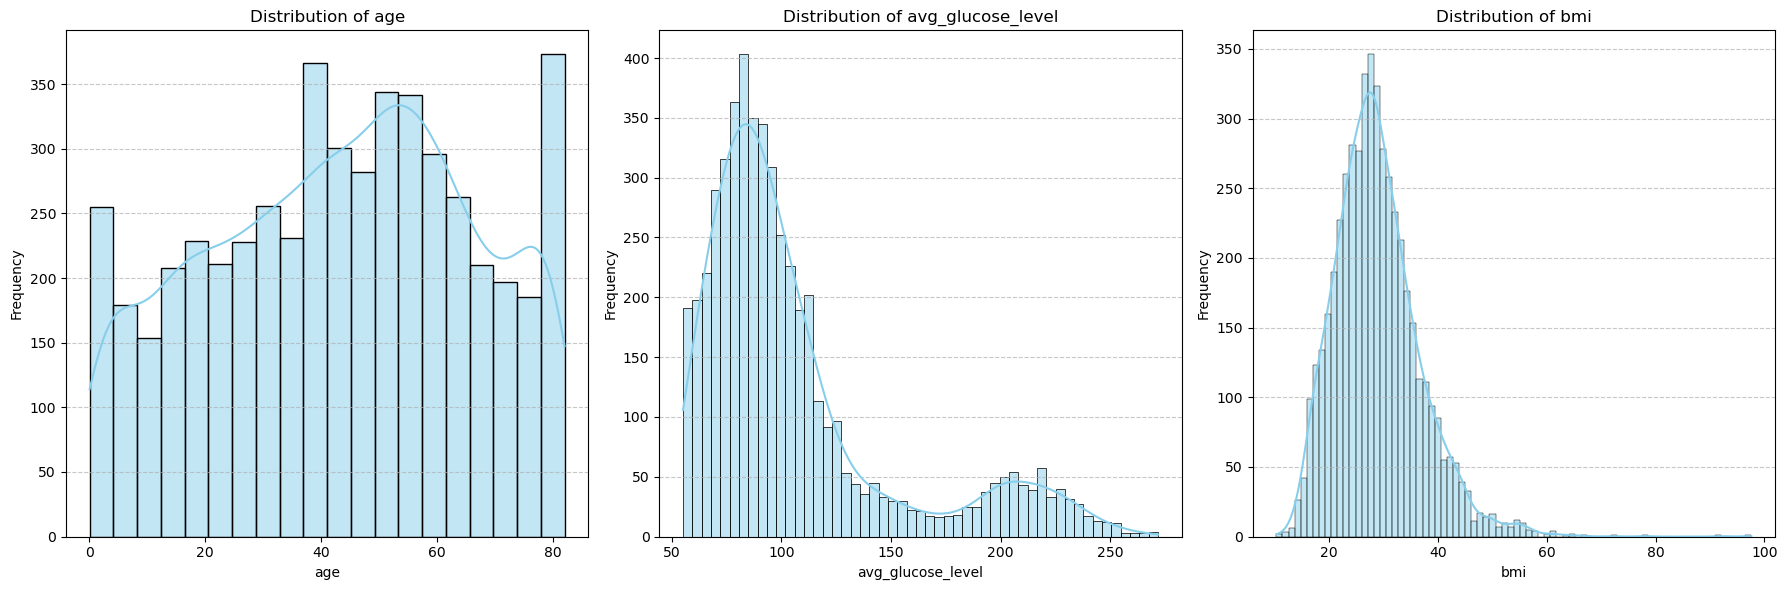

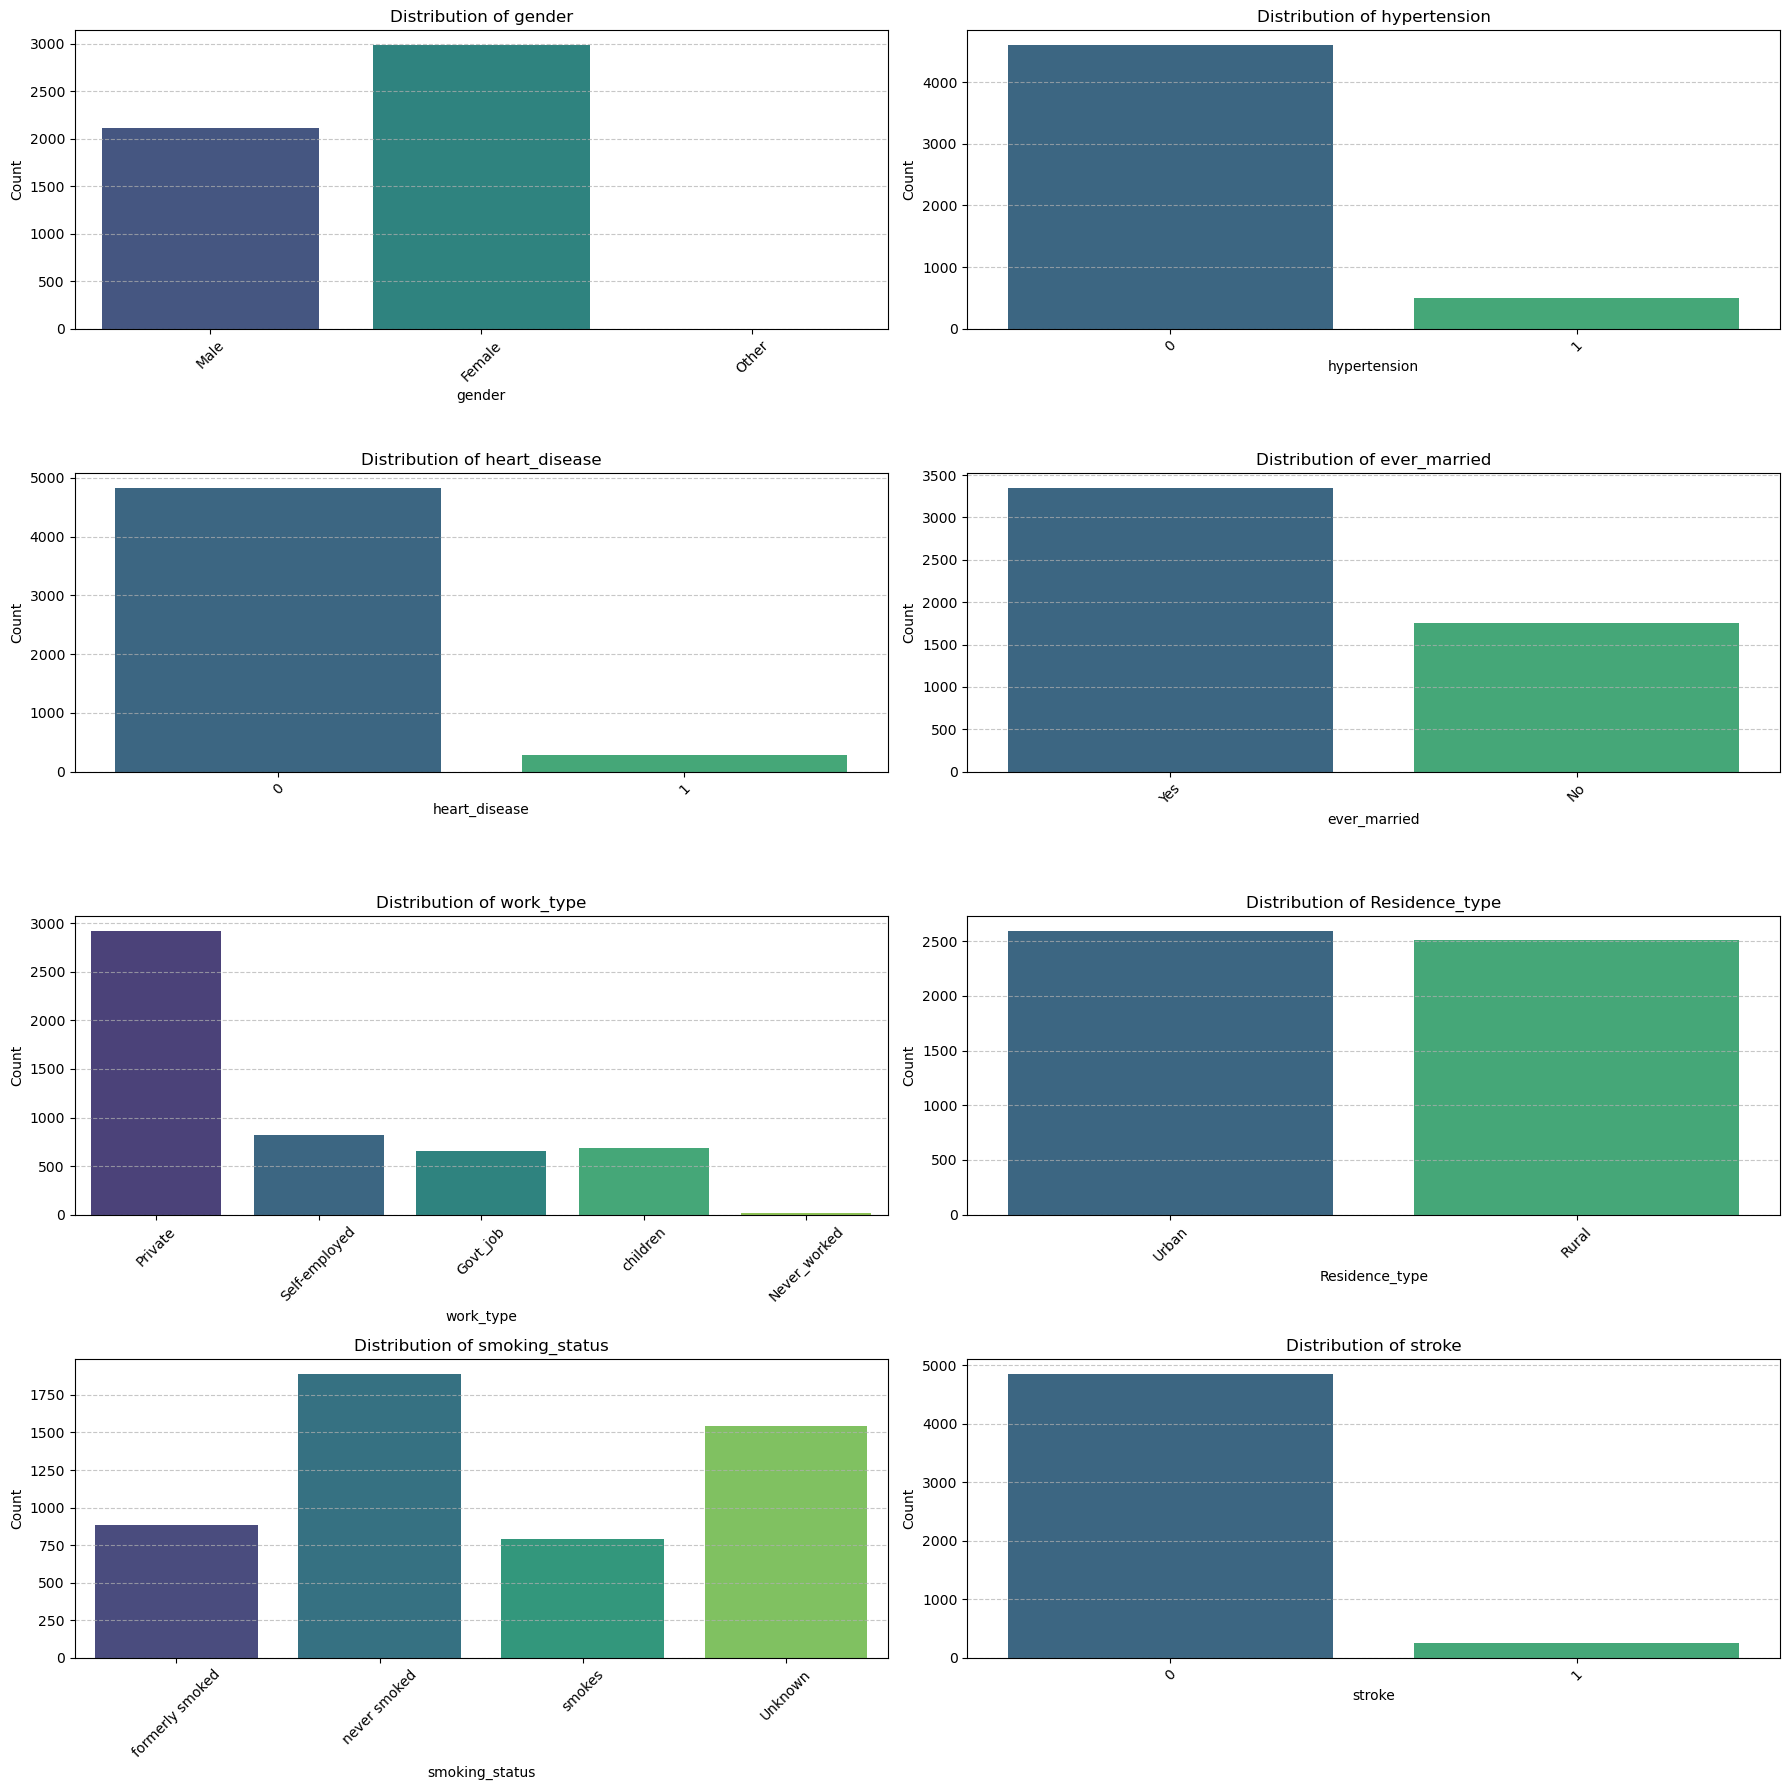

In [5]:
# Beginning to produce some exploratory visuals to better understand the data.  Using KDEs for numerical data 
# and count plots for categorical data.

# Plotting distributions for numerical variables
numerical_vars = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(18, 6))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting distributions for categorical variables
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
plt.figure(figsize=(18, 18))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=var, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

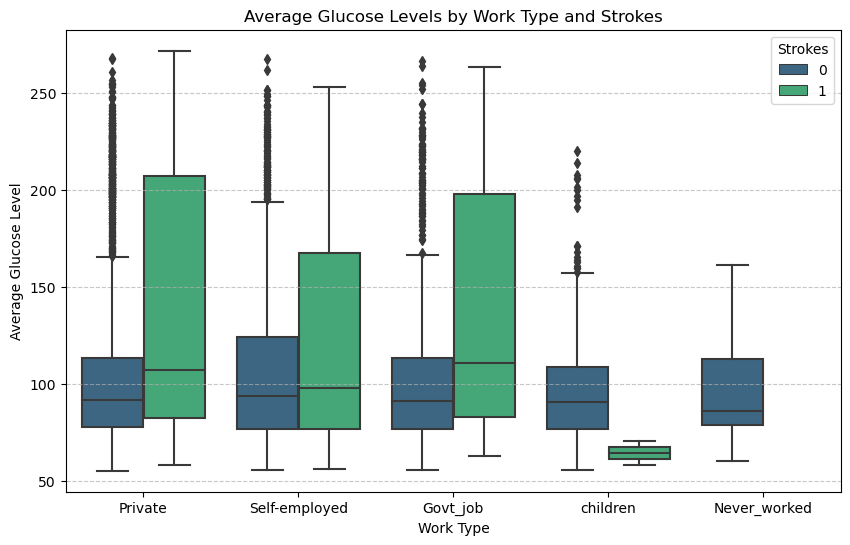

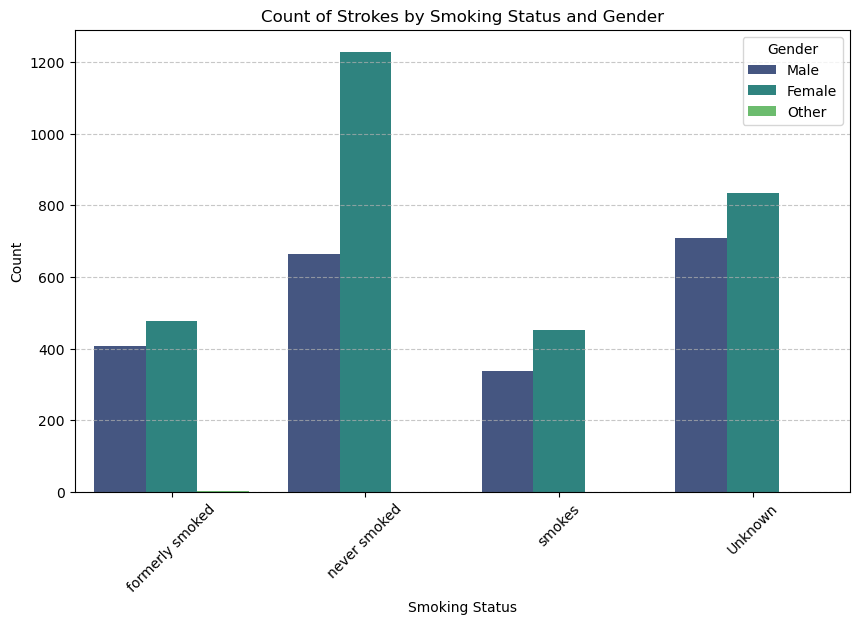

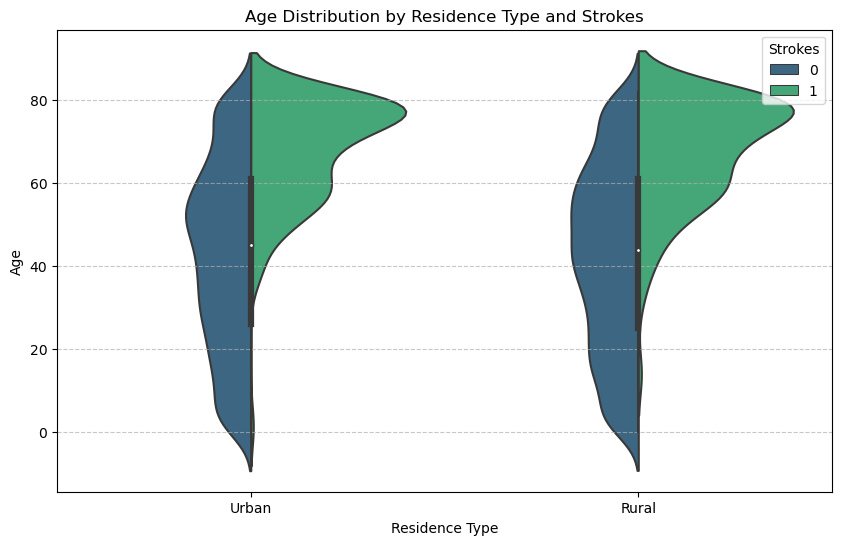

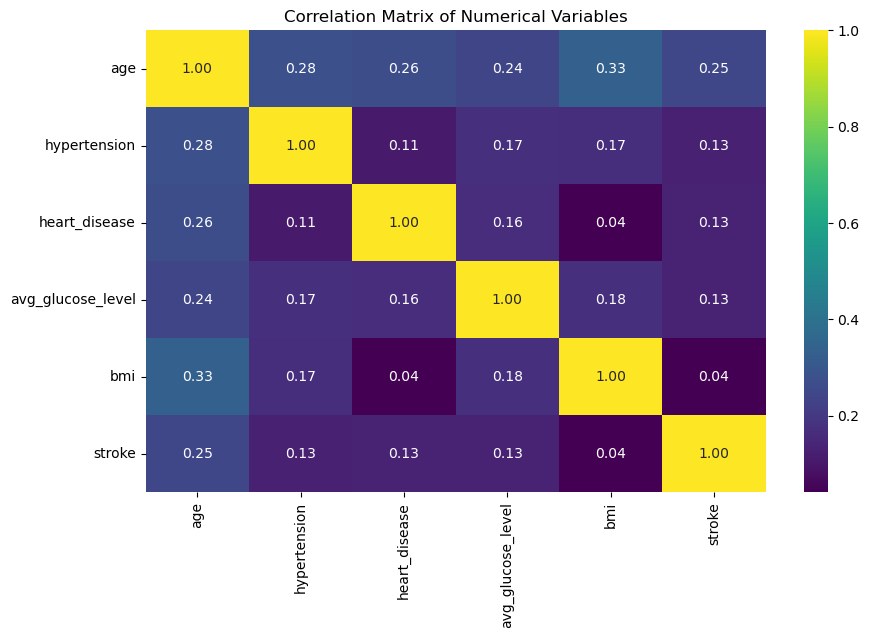

/Users/mattschnorr/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


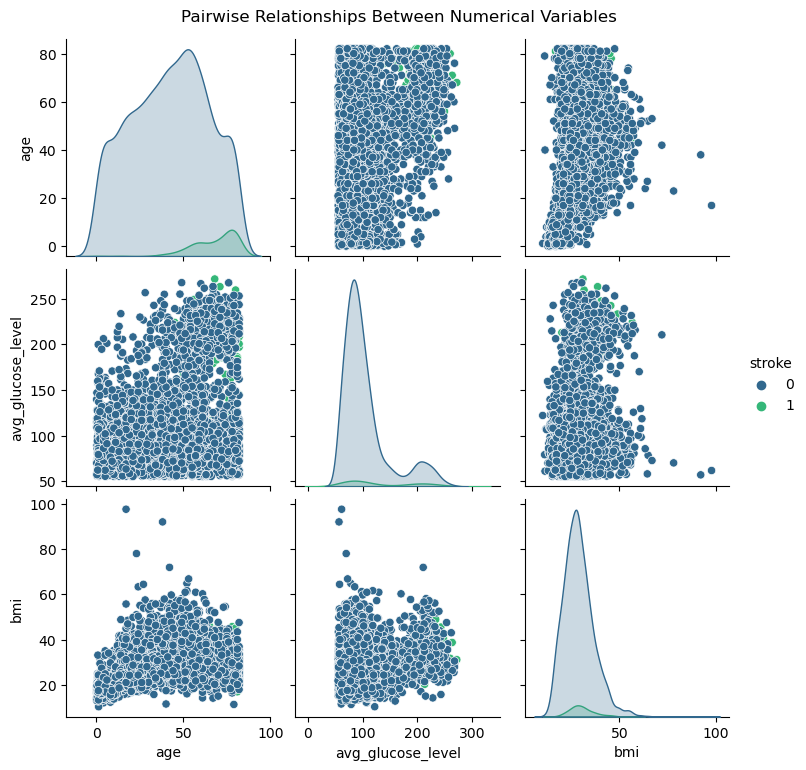

In [6]:
# Producing more visuals, this time focusing on possible contributing stroke factors and how they relate.

# 1. Box Plot: Average glucose levels by work type and strokes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_type', y='avg_glucose_level', hue='stroke', palette='viridis')
plt.title('Average Glucose Levels by Work Type and Strokes')
plt.xlabel('Work Type')
plt.ylabel('Average Glucose Level')
plt.legend(title='Strokes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Count Plot: Count of strokes by smoking status and gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='gender', palette='viridis')
plt.title('Count of Strokes by Smoking Status and Gender')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# 3. Violin Plot: Age distribution by residence type and strokes
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Residence_type', y='age', hue='stroke', split=True, palette='viridis')
plt.title('Age Distribution by Residence Type and Strokes')
plt.xlabel('Residence Type')
plt.ylabel('Age')
plt.legend(title='Strokes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Heatmap: Correlation matrix of numerical variables
plt.figure(figsize=(10, 6))
corr_matrix = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 5. Pair Plot: Pairwise relationships between numerical variables colored by strokes
sns.pairplot(df, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke', palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Numerical Variables', y=1.02)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [8]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns=['stroke'])
y = df['stroke']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by replacing with the mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


Model Accuracy: 0.9393346379647749

Confusion Matrix:
 [[960   0]
 [ 62   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Model Coefficients: [[ 6.15330334e-02  1.65523494e+00  1.04142152e-01  6.34059067e-02
   1.73986918e-01  3.32108950e-02 -6.87389294e-03  6.53402283e-03
   1.45932425e-01 -1.46272295e-01 -1.81454548e-01 -5.13018748e-02
   1.22184694e-02 -3.64609268e-01  5.84807352e-01 -1.76299400e-02
   1.72900698e-02 -2.77564852e-04 -5.92555984e-02 -1.25315469e-01
   1.84508762e-01]]
Model Intercept: [-3.92125225]

Coefficients DataFrame:
         id       age  hypertension  heart_disease  avg_glucose_level  \
0  0.061533  1.655235      0.104142       0.063406           0.173987

/Users/mattschnorr/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattschnorr/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattschnorr/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


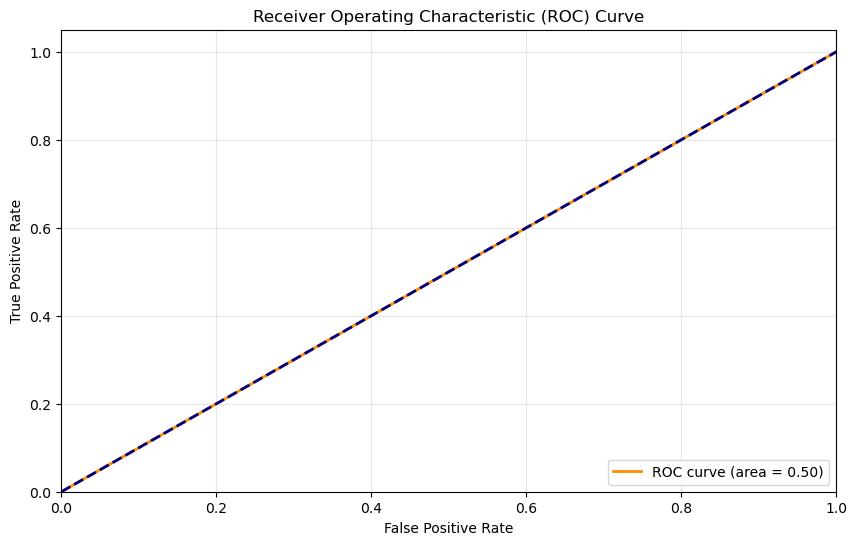

In [9]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Access the trained logistic regression model
model = pipeline.named_steps['classifier']

# Display the model's coefficients and intercept
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Display feature names for the coefficients
# This will include both original numeric features and the one-hot encoded categorical features
preprocessed_feature_names = numeric_features.tolist() + pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()

coefficients_df = pd.DataFrame(model.coef_, columns=preprocessed_feature_names)
print("\nCoefficients DataFrame:")
print(coefficients_df)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [10]:
# Get the coefficients and intercept from the best model
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Get feature names for the coefficients
numeric_features = numeric_features.tolist()
categorical_features = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
feature_names = numeric_features + categorical_features

# Create a DataFrame for the coefficients
coefficients_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Display the mathematical formula
formula = "logit(p) = " + " + ".join([f"{coeff:.4f}*{feature}" for feature, coeff in zip(feature_names, coefficients)])
formula += f" + {intercept:.4f}"

# Display the logistic regression model as a formula
print("The logistic regression model (log-odds) is:")
print(formula)

# Export the formula to a text file
with open("logistic_regression_formula.txt", "w") as file:
    file.write("The logistic regression model (log-odds) is:\n")
    file.write(formula)

The logistic regression model (log-odds) is:
logit(p) = 0.0615*id + 1.6552*age + 0.1041*hypertension + 0.0634*heart_disease + 0.1740*avg_glucose_level + 0.0332*bmi + -0.0069*gender_Female + 0.0065*gender_Male + 0.1459*ever_married_No + -0.1463*ever_married_Yes + -0.1815*work_type_Govt_job + -0.0513*work_type_Never_worked + 0.0122*work_type_Private + -0.3646*work_type_Self-employed + 0.5848*work_type_children + -0.0176*Residence_type_Rural + 0.0173*Residence_type_Urban + -0.0003*smoking_status_Unknown + -0.0593*smoking_status_formerly smoked + -0.1253*smoking_status_never smoked + 0.1845*smoking_status_smokes + -3.9213


In [11]:
# Display the mathematical formula for z
z_formula = "z = " + " + ".join([f"{coeff:.4f}*{feature}" for feature, coeff in zip(feature_names, coefficients)])
z_formula += f" + {intercept:.4f}"

print("The linear combination (z) part of the logistic regression model is:")
print(z_formula)

# Display the probability formula
probability_formula = "p = 1 / (1 + exp(-(" + z_formula + ")))"

print("\nThe logistic regression model as a probability equation is:")
print(probability_formula)

# Export the formulas to a text file
with open("logistic_regression_model.txt", "w") as file:
    file.write("The linear combination (z) part of the logistic regression model is:\n")
    file.write(z_formula + "\n\n")
    file.write("The logistic regression model as a probability equation is:\n")
    file.write(probability_formula)

The linear combination (z) part of the logistic regression model is:
z = 0.0615*id + 1.6552*age + 0.1041*hypertension + 0.0634*heart_disease + 0.1740*avg_glucose_level + 0.0332*bmi + -0.0069*gender_Female + 0.0065*gender_Male + 0.1459*ever_married_No + -0.1463*ever_married_Yes + -0.1815*work_type_Govt_job + -0.0513*work_type_Never_worked + 0.0122*work_type_Private + -0.3646*work_type_Self-employed + 0.5848*work_type_children + -0.0176*Residence_type_Rural + 0.0173*Residence_type_Urban + -0.0003*smoking_status_Unknown + -0.0593*smoking_status_formerly smoked + -0.1253*smoking_status_never smoked + 0.1845*smoking_status_smokes + -3.9213

The logistic regression model as a probability equation is:
p = 1 / (1 + exp(-(z = 0.0615*id + 1.6552*age + 0.1041*hypertension + 0.0634*heart_disease + 0.1740*avg_glucose_level + 0.0332*bmi + -0.0069*gender_Female + 0.0065*gender_Male + 0.1459*ever_married_No + -0.1463*ever_married_Yes + -0.1815*work_type_Govt_job + -0.0513*work_type_Never_worked + 0.01